In [35]:
# import the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras as kr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


In [2]:
# get the data online from yahoo api
df = web.DataReader('AAPL' ,data_source = 'yahoo' , start= '2013-01-01' ,end='2021-01-01')
df1 = web.DataReader('TSLA' ,data_source = 'yahoo' , start= '2013-01-01' ,end='2021-01-01')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03,2015.000000
mean,41.488487,40.634844,41.056426,41.077954,1.918590e+08,39.469141
std,25.347944,24.608141,24.988472,24.995352,1.313821e+08,25.530818
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.191197
25%,25.032499,24.570000,24.721250,24.756249,1.058954e+08,22.809145
50%,32.642502,32.080002,32.312500,32.340000,1.500468e+08,29.715235
75%,48.582500,47.775000,48.039999,48.165001,2.339392e+08,46.856506
max,138.789993,134.339996,138.050003,136.690002,1.460852e+09,136.486053


In [5]:
df.shape

(2015, 6)

Text(0, 0.5, 'Price')

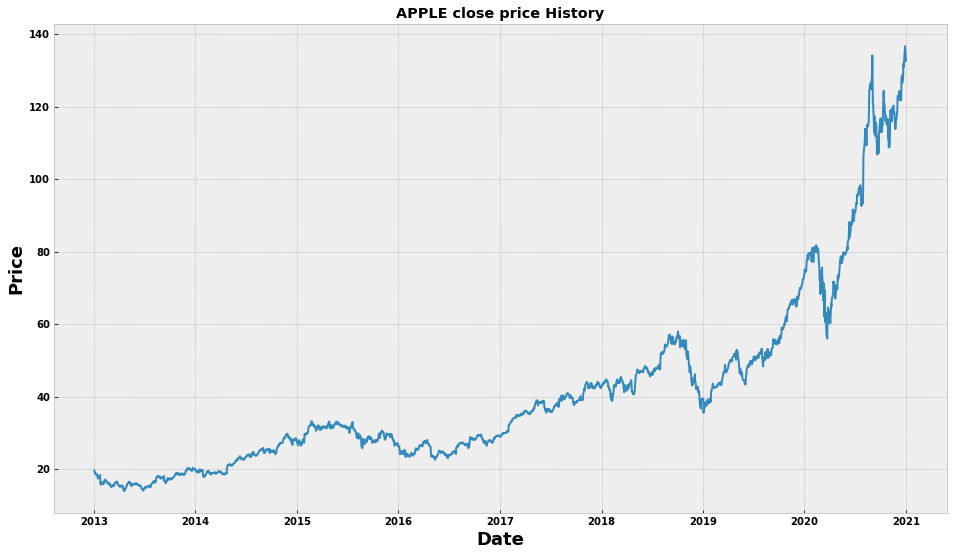

In [36]:
plt.figure(figsize = (16,9))
plt.title('APPLE close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)

In [37]:
df1.shape

(2015, 6)

Text(0, 0.5, 'Price')

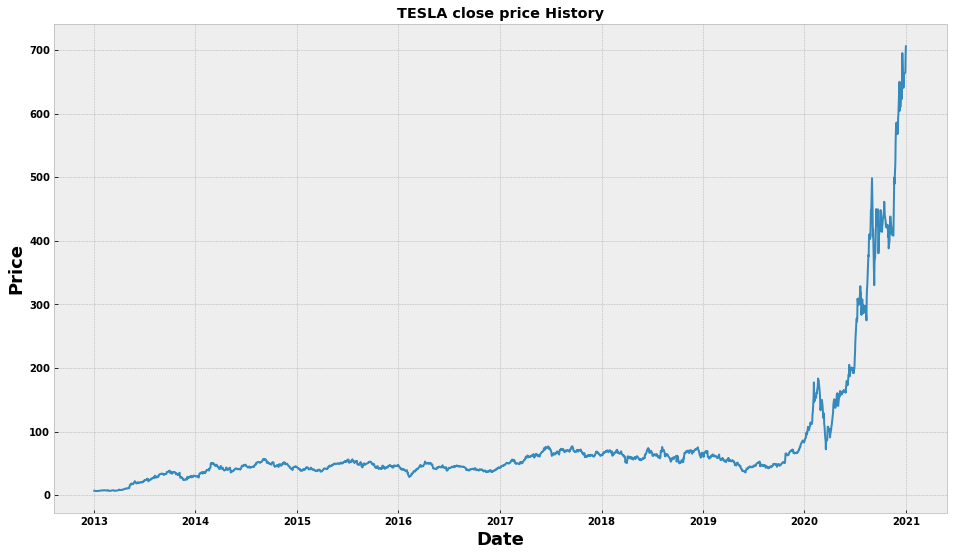

In [38]:
plt.figure(figsize = (16,9))
plt.title('TESLA close price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)

In [39]:
# create a new datafram with close price only
data = df.filter(['Close'])
#convert the data dataframe to numpy array
dataset= data.values
#get the number of rows to train the model 
training_data_len =math.ceil(len(dataset) * .8)

training_data_len

1612

In [40]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [41]:
scaled_data

array([[0.04611861],
       [0.04410219],
       [0.03970856],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [42]:
train_data = scaled_data[0:training_data_len , :]

In [43]:
# split the data into x_train data sets
x_train = []
y_train = []

In [44]:
for i in range (100, len(train_data) ):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 100 :
        print(x_train)
        print(y_train)
                  

[array([0.04611861, 0.04410219, 0.03970856, 0.03880656, 0.03921682,
       0.03682797, 0.03869309, 0.03775908, 0.0323616 , 0.02775555,
       0.03362439, 0.03263218, 0.0318524 , 0.03324032, 0.03592887,
       0.01744943, 0.01435933, 0.01725447, 0.01971025, 0.01929126,
       0.01890136, 0.01835724, 0.01506929, 0.01958514, 0.01944256,
       0.0226054 , 0.02457235, 0.02601263, 0.02251228, 0.02225332,
       0.02213112, 0.02026019, 0.02021071, 0.01696932, 0.01615751,
       0.01753962, 0.01520896, 0.01700424, 0.01572397, 0.0148016 ,
       0.01162131, 0.00858941, 0.01181625, 0.01022174, 0.01165331,
       0.01198502, 0.01377448, 0.01102773, 0.01100445, 0.01221198,
       0.01545919, 0.01896828, 0.0186104 , 0.01790915, 0.01809828,
       0.02076938, 0.0212553 , 0.02054533, 0.01790915, 0.01516822,
       0.0111674 , 0.01142345, 0.01206358, 0.01082114, 0.00950597,
       0.01038178, 0.01060582, 0.01314017, 0.01274445, 0.01142636,
       0.00853122, 0.01039051, 0.00357018, 0.00044228, 0.    

In [45]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
x_train.shape

(1512, 100)

In [47]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1512, 100, 1)

In [48]:
#build the LSTM model
model = kr.Sequential()


In [49]:
model.add(kr.layers.LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1) ) )
model.add(kr.layers.LSTM(50, return_sequences=False))
model.add(kr.layers.Dense(25))
model.add(kr.layers.Dense(1))

In [50]:
# compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [51]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1512/1512 [==============================] - 64s 42ms/step - loss: 2.9802e-04


In [52]:
# create the testing data set 
#create a new array containing scaled value from index 1543 to 2003
test_data = scaled_data[training_data_len - 100: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

In [53]:
# convert the data to a numpy array 
x_test = np.array(x_test)

In [54]:
x_test.shape

(403, 100)

In [55]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [56]:
# forcasting  , analysis from historical data 
# flactionation 
# change inflation rate, technology 


In [57]:
x_test.shape

(403, 100, 1)

In [58]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [59]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03,2015.000000
mean,41.488487,40.634844,41.056426,41.077954,1.918590e+08,39.469141
std,25.347944,24.608141,24.988472,24.995352,1.313821e+08,25.530818
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.191197
25%,25.032499,24.570000,24.721250,24.756249,1.058954e+08,22.809145
50%,32.642502,32.080002,32.312500,32.340000,1.500468e+08,29.715235
75%,48.582500,47.775000,48.039999,48.165001,2.339392e+08,46.856506
max,138.789993,134.339996,138.050003,136.690002,1.460852e+09,136.486053


In [60]:
# get the root mean squared error (RMSE
rmse= np.sqrt(np.mean(predictions -y_test)**2)
rmse

0.16969898498383704

C:\Users\MOKIJ\anaconda3\envs\H_project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


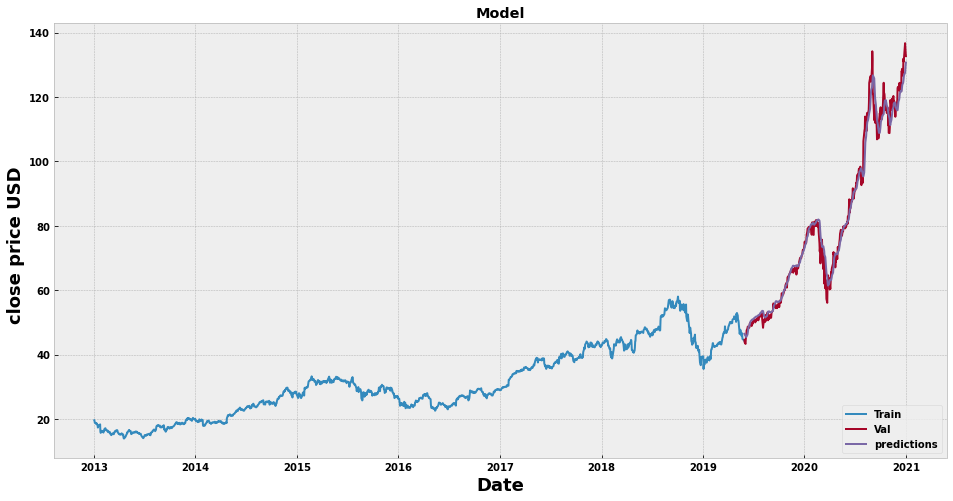

In [61]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']= predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'], loc='lower right')
